In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.shape

(1338, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


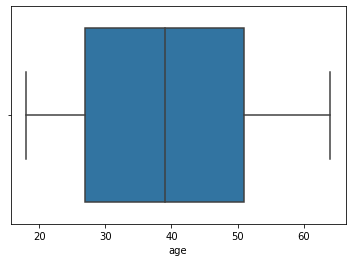

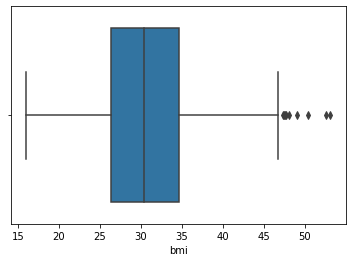

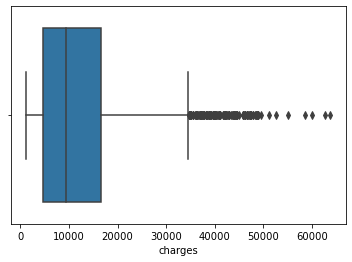

In [7]:
import warnings
warnings.filterwarnings('ignore')

num_col=['age','bmi','charges']

for col in num_col:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

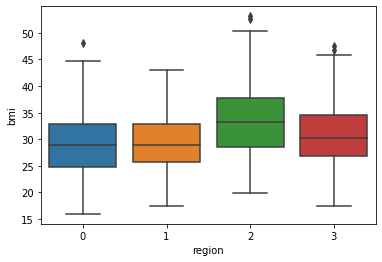

In [8]:
plt.figure()
sns.boxplot(data=df, x="region", y="bmi")
plt.show()

In [9]:
for place in df['region'].unique():
    region_bmi=df[df['region'] == place]['bmi']
    q1=np.quantile(region_bmi,0.25)
    q3=np.quantile(region_bmi,0.75)
    iqr=q3-q1
    uw=q3+1.5*iqr
    lw=q1-1.5*iqr
    
    index=region_bmi[region_bmi>uw].index
    if len(index)!=0:
        df.drop(index,inplace=True)

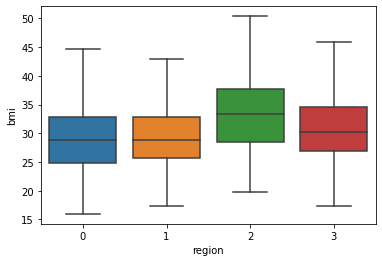

In [10]:
plt.figure()
sns.boxplot(data=df, x="region", y="bmi")
plt.show()

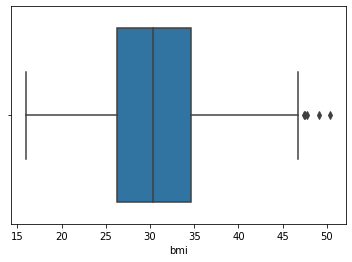

In [11]:
plt.figure()
sns.boxplot(df['bmi'])
plt.show()

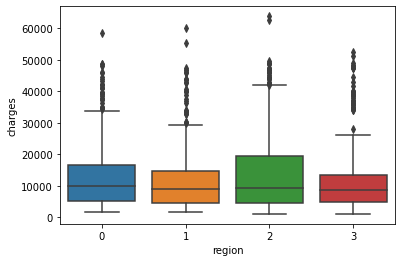

In [12]:
plt.figure()
sns.boxplot(data=df, x="region", y="charges")
plt.show()

In [13]:
for place in df['region'].unique():
    region_charges=df[df['region'] == place]['charges']
    q1=np.quantile(region_charges,0.25)
    q3=np.quantile(region_charges,0.75)
    iqr=q3-q1
    uw=q3+1.5*iqr
    lw=q1-1.5*iqr
    
    index=region_charges[region_charges>uw].index
    if len(index)!=0:
        df.drop(index,inplace=True)

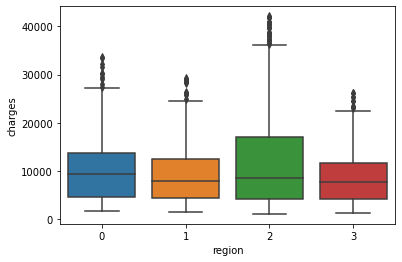

In [14]:
plt.figure()
sns.boxplot(data=df, x="region", y="charges")
plt.show()

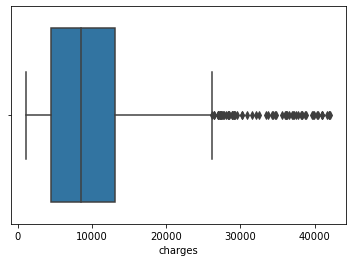

In [15]:
plt.figure()
sns.boxplot(df['charges'])
plt.show()

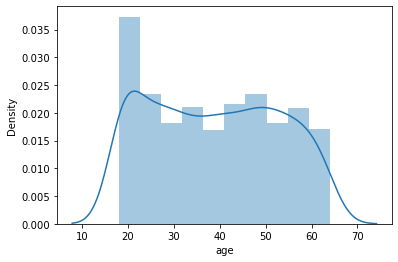

Skewness= 0.08421014536129048


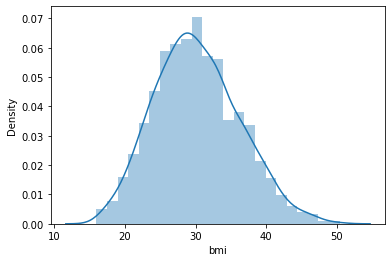

Skewness= 0.2987500648535858


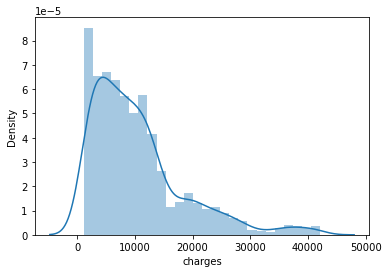

Skewness= 1.502274682120154


In [16]:
num_col=['age','bmi','charges']

from scipy.stats import skew

for col in num_col:
    plt.figure()
    sns.distplot(df[col])
    plt.show()
    print('Skewness=',skew(df[col]))

In [17]:
df['charges']=np.log(df['charges'])

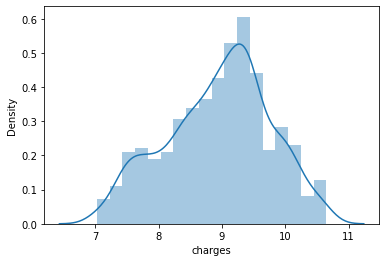

Skewness= -0.2494145442712068


In [18]:
plt.figure()
sns.distplot(df['charges'])
plt.show()
print('Skewness=',skew(df['charges']))

In [19]:
from sklearn.preprocessing import StandardScaler

for col in num_col:
    ss=StandardScaler()
    df[col] = ss.fit_transform(df[[col]])
    

In [20]:
# feature and target
# train test split

X = df.drop("insuranceclaim", axis=1)
y = df["insuranceclaim"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [21]:
# creating model and training 

model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [22]:
# train score

model.score(X_train, y_train)

0.8643867924528302

In [23]:
# prediction on test

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       164
           1       0.87      0.90      0.89       200

    accuracy                           0.87       364
   macro avg       0.87      0.87      0.87       364
weighted avg       0.87      0.87      0.87       364



In [27]:
import pickle

In [28]:
file=open('model.pkl','wb')
pickle.dump(model,file)
file.close()